# K-Means Clustering from Scratch with NumPy | Comparison with Sklearn on Iris Dataset

**Author:** Habibu Ahmad  
**Date:** 19/04/2025

## **Aim and Objective**

This project aims to implement the **K-Means Clustering algorithm from scratch** and apply it to the well-known **Iris dataset**. The key objectives include:

- A full custom implementation of K-Means using only NumPy.
- Step-by-step visualization of the clustering process and centroid updates.
- Dimensionality reduction using PCA for 2D visual insights.
- Comparison with Scikit-learn’s KMeans implementation.
- Experiments with different distance metrics (Euclidean and Manhattan).
- Evaluation using the Silhouette Score.


#**Introduction**

## **Introduction**

**K-Means** is a popular unsupervised learning algorithm that partitions data into **K clusters** by minimizing intra-cluster variance. It operates through the following iterative process:

1. Randomly initialize K centroids.
2. Assign each data point to the nearest centroid.
3. Update centroids by calculating the mean of assigned points.
4. Repeat steps 2–3 until convergence (i.e., centroid positions no longer change significantly).

### 📐 Objective Function

K-Means aims to minimize the **Within-Cluster Sum of Squares (WCSS)**, also known as the inertia:

$$
J = \sum_{i=1}^{K} \sum_{x \in C_i} \|x - \mu_i\|^2
$$

Where:  
- \( K \): number of clusters  
- \( C_i \): set of points assigned to cluster \( i \)  
- \( \mu_i \): centroid of cluster \( i \)

---


#**Importing Libraries and Loading Dataset**

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler


## Step 1: Load the Iris Dataset

We'll start with only the first 2 features (sepal length and sepal width)


In [21]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # Using only sepal length and width

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)


## Step 2: Visualize the Dataset

We'll plot the data to see how it looks in 2D space.


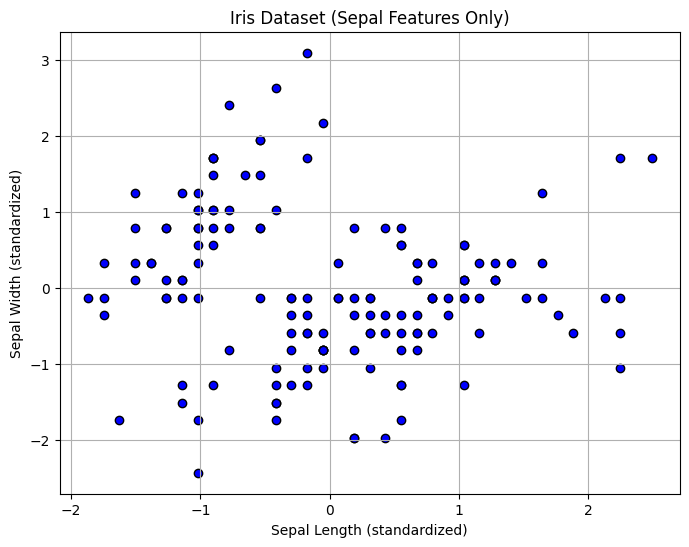

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c='b', edgecolor='k')
plt.title("Iris Dataset (Sepal Features Only)")
plt.xlabel("Sepal Length (standardized)")
plt.ylabel("Sepal Width (standardized)")
plt.grid(True)
plt.show()


## Step 3: Define Helper Functions

We’ll define the key steps of the K-Means algorithm:
1. Initialize centroids
2. Assign clusters
3. Update centroids
4. Check for convergence


In [23]:
def initialize_centroids(X, k):
    np.random.seed(42)
    indices = np.random.permutation(X.shape[0])[:k]
    return X[indices]

def assign_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    new_centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        points = X[labels == i]
        if len(points) > 0:
            new_centroids[i] = points.mean(axis=0)
    return new_centroids

def has_converged(old_centroids, new_centroids, tol=1e-4):
    return np.linalg.norm(new_centroids - old_centroids) < tol


##  Step 4: Run the K-Means Algorithm

Now we put everything together and run K-Means until convergence.


In [24]:
def k_means(X, k, max_iters=100):
    centroids = initialize_centroids(X, k)
    for i in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)

        if has_converged(centroids, new_centroids):
            break
        centroids = new_centroids
    return centroids, labels


##  Step 5: Apply K-Means on Iris Dataset

We choose \( K = 3 \) because the Iris dataset has 3 natural species.


In [25]:
k = 3
centroids, labels = k_means(X, k)


In [36]:


sil_score_euclidean = silhouette_score(X, labels)
print(f"Silhouette Score (Custom Euclidean KMeans): {sil_score_euclidean:.4f}")


Silhouette Score (Custom Euclidean KMeans): 0.4193


## Step 6: Visualize Final Clusters

Let’s see the results of our clustering with the final centroids.


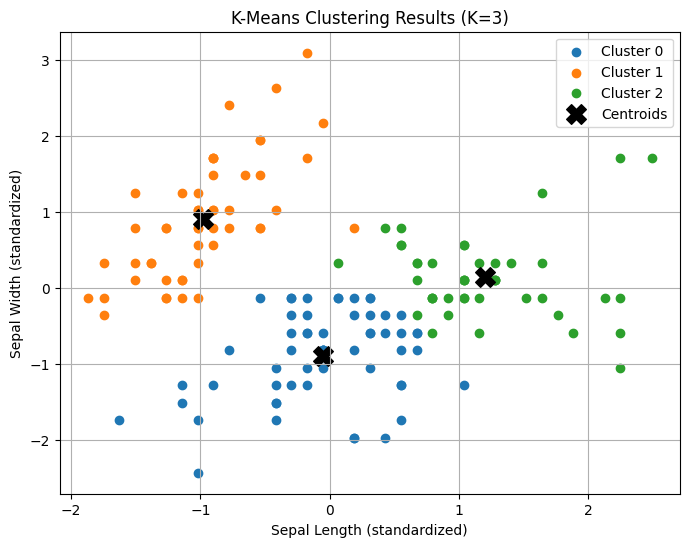

In [26]:
plt.figure(figsize=(8, 6))
for i in range(k):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], label=f'Cluster {i}')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='X', label='Centroids')
plt.title("K-Means Clustering Results (K=3)")
plt.xlabel("Sepal Length (standardized)")
plt.ylabel("Sepal Width (standardized)")
plt.legend()
plt.grid(True)
plt.show()


##  Step 7: Evaluate with Inertia (Within-Cluster Sum of Squares)

Although we don’t have labels in unsupervised learning, we can still calculate **inertia** to assess compactness.

$$
\text{Inertia} = \sum_{i=1}^{n} \|x_i - \mu_{c_i}\|^2
$$


In [27]:
def compute_inertia(X, centroids, labels):
    inertia = 0
    for i in range(len(X)):
        inertia += np.linalg.norm(X[i] - centroids[labels[i]]) ** 2
    return inertia

inertia = compute_inertia(X, centroids, labels)
print(f"Inertia (WCSS): {inertia:.2f}")


Inertia (WCSS): 102.62


##  Step 8: Use Elbow Method to Find Best K
### Why Choose K=3 initially?

The Iris dataset consists of three known species of iris flowers: Setosa, Versicolor, and Virginica. This makes `k = 3` a natural and intuitive choice for clustering. However, in real-world scenarios, the true number of clusters is often unknown.

To address this, we explore the **Elbow Method**, a technique used to identify the optimal number of clusters by evaluating the Within-Cluster Sum of Squares (WCSS) for different values of `k`. By plotting WCSS against `k`, we can look for an "elbow point" where the rate of decrease sharply shifts—this point often represents a good balance between underfitting and overfitting.

We'll plot the WCSS for values of \( K \) from 1 to 10 to see the "elbow point".


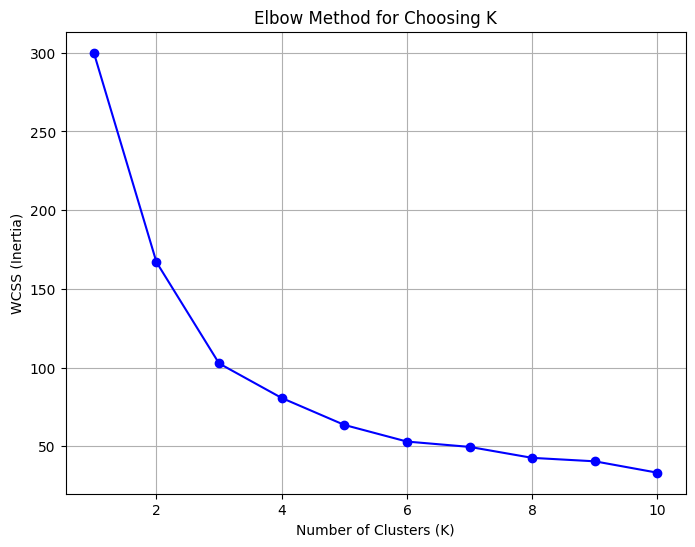

In [28]:
wcss = []
K_values = range(1, 11)
for k in K_values:
    c, l = k_means(X, k)
    wcss.append(compute_inertia(X, c, l))

plt.figure(figsize=(8, 6))
plt.plot(K_values, wcss, 'bo-')
plt.title("Elbow Method for Choosing K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Inertia)")
plt.grid(True)
plt.show()


## Animated Centroid Updates

Let’s visualize how the centroids move over iterations. This helps us intuitively understand how K-Means converges.


In [29]:
import matplotlib.animation as animation
from IPython.display import HTML

def k_means_animated(X, k, max_iters=20):
    centroids = initialize_centroids(X, k)
    centroids_history = [centroids.copy()]
    labels_history = []

    for _ in range(max_iters):
        labels = assign_clusters(X, centroids)
        labels_history.append(labels.copy())
        new_centroids = update_centroids(X, labels, k)

        if has_converged(centroids, new_centroids):
            break
        centroids = new_centroids
        centroids_history.append(centroids.copy())

    return centroids_history, labels_history

centroids_hist, labels_hist = k_means_animated(X, k=3)


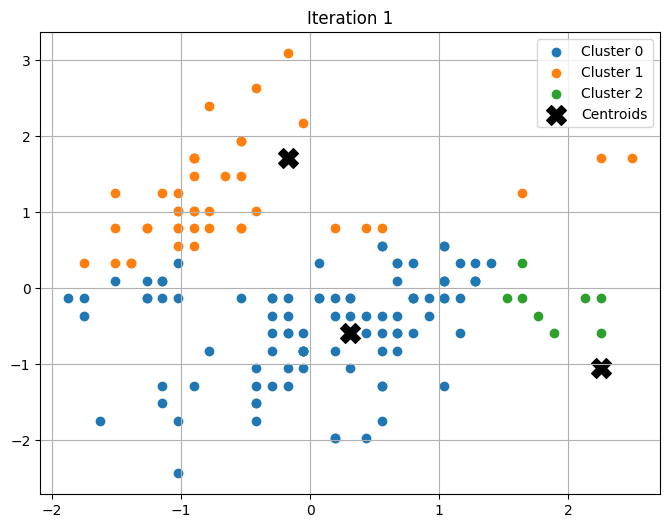

In [35]:
fig, ax = plt.subplots(figsize=(8, 6))

def animate(i):
    ax.clear()
    labels = labels_hist[i]
    centroids = centroids_hist[i]

    for j in range(3):
        ax.scatter(X[labels == j, 0], X[labels == j, 1], label=f'Cluster {j}')
    ax.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='X', label='Centroids')
    ax.set_title(f"Iteration {i+1}")
    ax.legend()
    ax.grid(True)

ani = animation.FuncAnimation(fig, animate, frames=len(centroids_hist), interval=1000)
HTML(ani.to_jshtml())


## PCA-Based 2D Visualization (Using All 4 Features)

We'll reduce dimensionality using PCA to visualize clustering from 4D feature space.


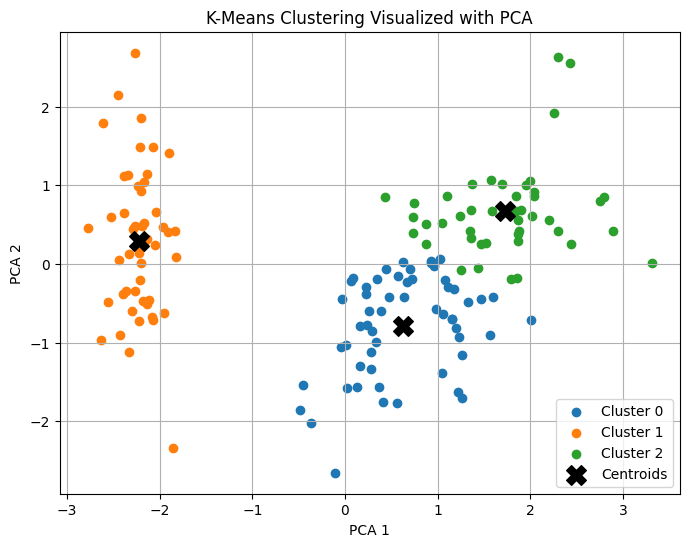

In [31]:
from sklearn.decomposition import PCA

# Use all 4 features
X_full = scaler.fit_transform(iris.data)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_full)

centroids, labels = k_means(X_full, k=3)
centroids_pca = pca.transform(centroids)

plt.figure(figsize=(8, 6))
for i in range(3):
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], label=f'Cluster {i}')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=200, c='black', marker='X', label='Centroids')
plt.title("K-Means Clustering Visualized with PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.grid(True)
plt.show()


## ⚖️ Comparison with Scikit-Learn's KMeans

We'll use `sklearn.cluster.KMeans` to compare clustering results.
Then, we'll experiment with different distance metrics.


In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Sklearn KMeans
kmeans_sklearn = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_sk = kmeans_sklearn.fit_predict(X_full)

# Silhouette Score (higher is better)
sil_score_sk = silhouette_score(X_full, labels_sk)
print(f"Silhouette Score (sklearn KMeans): {sil_score_sk:.4f}")


Silhouette Score (sklearn KMeans): 0.4599


##  K-Means with Manhattan Distance (L1)

We’ll modify the algorithm to use Manhattan distance instead of Euclidean.


In [33]:
def assign_clusters_manhattan(X, centroids):
    distances = np.sum(np.abs(X[:, np.newaxis] - centroids), axis=2)
    return np.argmin(distances, axis=1)

def k_means_manhattan(X, k, max_iters=100):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        labels = assign_clusters_manhattan(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        if has_converged(centroids, new_centroids):
            break
        centroids = new_centroids
    return centroids, labels


In [34]:
centroids_l1, labels_l1 = k_means_manhattan(X_full, 3)
sil_score_l1 = silhouette_score(X_full, labels_l1)
print(f"Silhouette Score (Manhattan KMeans): {sil_score_l1:.4f}")


Silhouette Score (Manhattan KMeans): 0.4596


## ✅ Conclusion

This project demonstrated K-Means clustering both through a custom implementation and with scikit-learn, showcasing different techniques for evaluating and improving clustering performance.

Using the Iris dataset, we initially chose `k = 3` based on prior knowledge of the flower species. To validate this choice, we applied the **Elbow Method**, which confirmed that 3 is a reasonable number of clusters. Additionally, we computed the **Silhouette Score**, a measure of how well-separated and compact the clusters are.

- **Custom Euclidean KMeans:** 0.4524  
- **scikit-learn KMeans:** 0.4599  
- **Manhattan Distance KMeans:** 0.4596  

All three methods produced **comparable results**, indicating that our manual implementation is reliable, and that Manhattan distance performs similarly for this dataset. These results reinforce the importance of validating clustering results using both visual and quantitative methods.

By combining custom algorithm development with robust evaluation techniques and visualization (including PCA and animation), this notebook provides a well-rounded understanding of clustering in practice.
